In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# normalize improve the behavior of the network (significantly!)
# x_train, x_test = x_train/255, x_test/255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
print(x_train[0].flatten()[140:160])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00393124 0.02332955 0.02620568 0.02625207 0.17420356 0.17566281
 0.28629534 0.05664824]


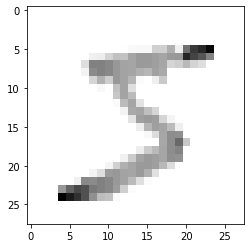

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
model = tf.keras.models.Sequential()
# input layer (np.reshape() = Flatten())
model.add(tf.keras.layers.Flatten())
# hidden layers (Dense layer with 128 neurals, relu as default, 2 layers)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer (softmax for probability distribution)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
'''
# Another way to do that
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])'''

"\n# Another way to do that\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Flatten(input_shape=(28,28)),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(10, activation='softmax')\n])"

In [10]:
model.compile(optimizer='adam', # 'adam' is better than stochastic gredient decent
             loss='sparse_categorical_crossentropy',  # could be sth. like binary
             metrics=['accuracy'])  # we want to track accuracy metricx

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 556us/step - loss: 0.2656 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 1s 538us/step - loss: 0.1057 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.0729 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.0528 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 1s 555us/step - loss: 0.0410 - accuracy: 0.9865


In [12]:
# try on test set to see whether overfit
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)
print(validation_loss, validation_accuracy)

313/313 [==============================] - 0s 411us/step - loss: 0.0921 - accuracy: 0.9717
0.09210125356912613 0.9717000126838684


In [13]:
# save a model, making it easier to reload
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
# load and use the saved model
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)

In [15]:
# directly print the 'prediction' is messy
# they are one-hot array indicate how likely
# the number on the image is  0, 1, 2, ..., 9
print(predictions)

[[1.74981185e-09 6.30225205e-09 4.92978756e-07 ... 9.99995947e-01
  3.36918410e-10 2.05213283e-07]
 [2.67603079e-10 9.55658152e-07 9.99999046e-01 ... 1.52940143e-11
  8.41994183e-11 7.84013865e-15]
 [9.70842677e-08 9.99698162e-01 1.30810085e-05 ... 4.04311832e-05
  2.42739174e-04 3.14110849e-07]
 ...
 [6.97822529e-12 3.89683263e-09 5.66739255e-13 ... 7.09792232e-07
  1.39973133e-09 9.09834228e-07]
 [9.11120512e-10 1.73332182e-09 2.77308454e-10 ... 8.83637963e-09
  1.17677206e-04 3.36264683e-10]
 [7.90393351e-09 7.54972884e-09 7.98410138e-09 ... 3.58369476e-13
  1.57250852e-08 2.59114496e-12]]


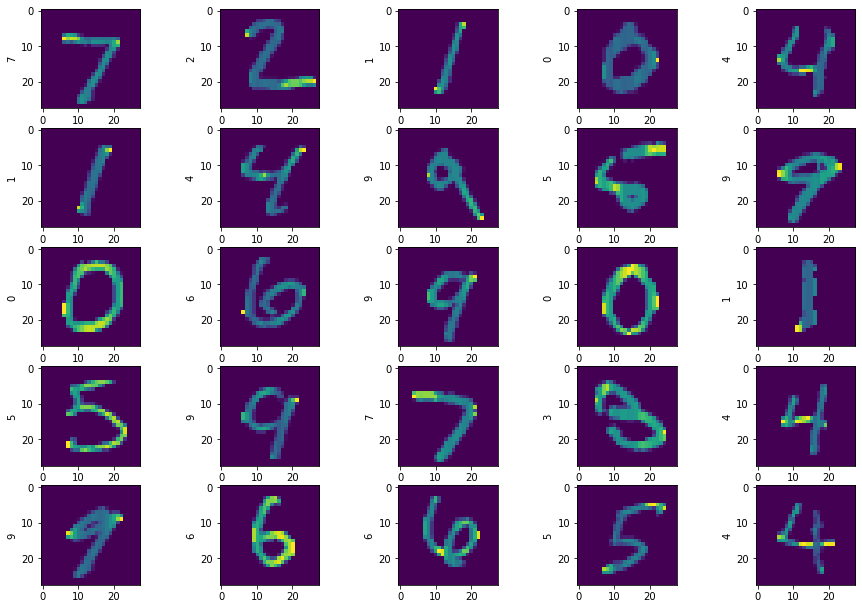

In [27]:
import numpy as np
n_row = 5
n_col = 5
fig, axis = plt.subplots(n_row, n_col)
# fig.tight_layout()
plt.subplots_adjust(2,2,4,4)
for i in range(n_row):
    for j in range(n_col):
        t = i * n_col + j
        plt.subplot(n_row, n_col, t + 1)
        plt.imshow(x_test[t])
        plt.ylabel(np.argmax(predictions[t]))
#         plt.axis('off')
plt.show()